# Investigation of the Iris flower data set

## Table of contents
1. [Introduction](#introduction)

2. [Questioning](#questioning)

3. [Wrangling](#wrangling)

    3.1. [Import libraries](#31)
    
    3.2. [Read in Iris flower dataset from csv file](#32)
    
4. [Exploration](#exploration)
   
    4.1 [Average values of attributes](#41)
    
    4.2 [Median values of attributes](#42)
    
    4.3 [Difference between medians and means](#43)
    
    4.4 [Shapiro-Wilk test for normality](#44)
    
    4.5 [Difference between means](#45)
    
    4.6 [Test for statistical significance ](#46)
    
    4.7 [Correlations between pairs of attributes](#47)
    
    4.8 [Output data to summary.txt](#48)
    
5. [Conclusions](#conclusions)

6. [Bibliography](#bibliography)

## 1 Introduction <a name="introduction"></a>
The purpose of this project is to simulate a dataset which represents income in the United States and the various factors that are associated with same. In this instance, the factors are IQ and personality (Big Five traits Openness, Conscientiousness, Extraversion, Agreeableness and Neuroticism) [1]

The study of the distribution of Income and the factors that correlated with it are of interest because of questions concerning income equality, factors relating to success and possible negative effects relating to high and low income.

Each of the factors and their distribution are described as follows:

## 2 Factors <a name="factors"></a>

## 2.1 Income
The factor that is of primary concern in this simulation is total lifetime income in the United States (called **I** for convenience here). The aim of the project is to simulate a distribution of total lifetime income given the mean and standard deviation of total lifetime income given in the paper[2].

Generally, income (including lifetime income) is best described using the lognormal distribution as the mode tends to be less than the median which is less than the mean (reflecting income equality). However, due to the earnings were capped at a taxable maximum, the data is not sufficiently skewed to justify the transformation and can be modelled as a normal distribution.

The mean and standard deviation are 980,000 and 738,000 respectively.

In [4]:
m1 = 980000
stdev1 = 738000

The values for mu and sigma produce the correct mean and median values for the lognormal distribution.

## 2.2 Cognitive ability
Cognitive ability as measured by the paper includes memory, vocabulary and numeracy. It correlates positively with income. These measures (in particular vocabulary) correlate very highly with IQ[3]. IQ is measured initially on an ordinal scale with percentiles but is approximated on the interval scale as a normal distribution or bell curve across a whole population[4].

In the paper, the mean and standard deviation are 0 and 1.

In [2]:
m2 = 0
stdev2 = 1

## 2.3 Big Five Personality Traits
The Big Five Personaltiy traits are an attempt by psychologists to encapsulate and quantify several personality traits[5]. They traits are similar to IQ in that they are measured on the ordinal scale by psychologists but approximated on the interval scale as a normal distribution across a whole population[6]. The traits are measured on a scale where 4 means an individual scores extremely high in a trait, 1 means they score extremely low in a trait and 2 means the individual scores neither high nor low in a trait.
The Big Five traits are Openness, Conscientiousness, Extraversion, Agreeableness and Emotional Stability/Neuroticism (the facets and domains of the Big Five are not considered here). The mean and standard deviations are drawn from the paper.
### 2.3.1 Openness
Openness measures the level of interest in art, intellectual pursuits and creativity in an individual. It also measures how unconventional and fantasy-prone they are. It correlates positively with income. The mean is 1.95 and the standard deviation is 0.55. 
### 2.3.2 Conscientiousness
Conscientiousness measures how industrious, organised and self-disciplined an individual is. It also measures how cautious and dutiful they are. It correlates positively with income. The mean is 2.56 and the standard deviation is 0.48.
### 2.3.3 Extraversion
Extraversion measures how talkative, assertive and sensation-seeking an individual is. It also measures thier level of activity and positive emotions. It correlates negatively with income. The mean is 2.2 and 0.55.
### 2.3.4 Agreeableness
Extraversion measures how modest, altruistic and honest an individual is. It also measures how compassionate  and trusting they are. It correlates negatively with income. The mean is 2.53 and the standard deviation is 0.47.
### 2.3.5 Emotional Stability/Neuroticism
Emotional stability is the reverse of Neuroticism. Neuroticism measures how anxious, fearful and depressed an individual is. It also measures how self-conscious and impulsive they are. It correlates negatively with Income, whereas its reverse Emotional Stability correlates positively with income. The mean (of Emotional Stability) is 2.71 and the standard deviation is 0.61.

In [3]:
m3 = 1.95
m4 = 2.56
m5 = 2.2
m6 = 2.53
m7 = 2.71
stdev3 = 0.55
stdev4 = 0.48
stdev5 = 0.55
stdev6 = 0.47
stdev7 = 0.61

# 3 Simulation
Since all the factors correlate with income (and most the factors also correlate with each other to some degree), the multivariate normal distribution is used to generate the dataset[5]. The mean vector and the  must be set and input:

In [6]:
mean = [m1, m2, m3, m4, m5, m6, m7]
print(mean)

[980000, 0, 1.95, 2.56, 2.2, 2.53, 2.71]


The covariance matrix is calculated by first getting the correlation matrix (the correlations taken from the paper) as follows[6] (pretty_print_matrix taken from stack overflow)

In [48]:
def pretty_print_matrix(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))



p1= [1, 0.67, 0.61, 0.63, 0.23, 0.27, 0.08]
p2 = [0.67, 1, 0.68, 0.51, 0.2, 0.27, 0.1]
p3 = [0.61, 0.68, 1, 0.8, 0.25, 0.01, -0.04]
p4 = [0.63, 0.51, 0.8, 1, 0.07, 0.02, -0.14]
p5 = [0.23, 0.20, 0.25, 0.07, 1, 0.16, 0.16]
p6 = [0.27, 0.27, 0.01, 0.02, 0.16, 1, 0.34]
p7 = [0.08, 0.10, -0.04, -0.14, 0.16, 0.34, 1]

corr = [p1, p2, p3, p4, p5, p6, p7]
pretty_print_matrix(corr)

1   	0.67	0.61 	0.63 	0.23	0.27	0.08 
0.67	1   	0.68 	0.51 	0.2 	0.27	0.1  
0.61	0.68	1    	0.8  	0.25	0.01	-0.04
0.63	0.51	0.8  	1    	0.07	0.02	-0.14
0.23	0.2 	0.25 	0.07 	1   	0.16	0.16 
0.27	0.27	0.01 	0.02 	0.16	1   	0.34 
0.08	0.1 	-0.04	-0.14	0.16	0.34	1    


To get the covariance matrix, the standard deviations vecotr is obtained:

In [64]:
stdev_v = [stdev1, stdev2, stdev3, stdev4, stdev5, stdev6, stdev7]

This is transformed using **numpy** into its diagonal:

In [50]:
import numpy as np
stdev_v = np.array(stdev_v)

In [74]:
#cov = stdev_v*np.array(corr)
#print(cov)


cov = stdev_v *np.array(corr) * np.transpose(stdev_v)
print(cov)
print(stdev_v)
print(np.transpose(np.array(stdev_v)))

#np.random.multivariate_normal(mean, cov, 5000)

[[ 5.4464400e+11  6.7000000e-01  1.8452500e-01  1.4515200e-01
   6.9575000e-02  5.9643000e-02  2.9768000e-02]
 [ 3.6491148e+11  1.0000000e+00  2.0570000e-01  1.1750400e-01
   6.0500000e-02  5.9643000e-02  3.7210000e-02]
 [ 3.3223284e+11  6.8000000e-01  3.0250000e-01  1.8432000e-01
   7.5625000e-02  2.2090000e-03 -1.4884000e-02]
 [ 3.4312572e+11  5.1000000e-01  2.4200000e-01  2.3040000e-01
   2.1175000e-02  4.4180000e-03 -5.2094000e-02]
 [ 1.2526812e+11  2.0000000e-01  7.5625000e-02  1.6128000e-02
   3.0250000e-01  3.5344000e-02  5.9536000e-02]
 [ 1.4705388e+11  2.7000000e-01  3.0250000e-03  4.6080000e-03
   4.8400000e-02  2.2090000e-01  1.2651400e-01]
 [ 4.3571520e+10  1.0000000e-01 -1.2100000e-02 -3.2256000e-02
   4.8400000e-02  7.5106000e-02  3.7210000e-01]]
[738000, 1, 0.55, 0.48, 0.55, 0.47, 0.61]
[7.38e+05 1.00e+00 5.50e-01 4.80e-01 5.50e-01 4.70e-01 6.10e-01]


## 3 Wrangling <a name="wrangling"></a>
The data is imported from the CSV file "iris.csv", obtained from the website [3](#ref3). First, the appropriate libraries are imported to import and display the data:

### 3.1 Import libraries <a name="31"></a>

In [148]:
# Import pandas to import and display CSV data as dataframe
import pandas as pd
# Import and start seaborn to make plots look better
import seaborn as sns
sns.set()
# Import scipy library for tests for statistical significance
from scipy import stats
# Import pyplot for more plotting options
import matplotlib.pyplot as plt
# Import shapiro for Shapiro-Wilk test for normality
from scipy.stats import shapiro
# Import os for file removal
import os

### 3.2 Read in Iris flower dataset from csv file <a name="32"></a>

The data is then set as a Pandas dataframe called **df**. This dataframe has the attributes **petal length**, **petal width**, **sepal length**, **sepal width** and the **species** of each flower collected in the sample. The data is loaded into the dataframe in the following cell:

In [149]:
# df is the main dataframe that will be used.
df = pd.read_csv("iris.csv")

The first 5 entries of the dataframe are shown in the following cell:

In [150]:
# 5 entries in dataframe to show.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The number of null, N/A or blank entries must be determined to see if data is missing:

In [151]:
# Find the null, blank or N/A entries and sum them.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

It can be seen that there are no null or blank entries so it can be assumed for this analysis that no data is missing.

The exploration phase of the analysis is described in the next section.

## 4 Exploration <a name="exploration"></a>
The data is summarised using the **pairplot** functtion from the **seaborn** module:

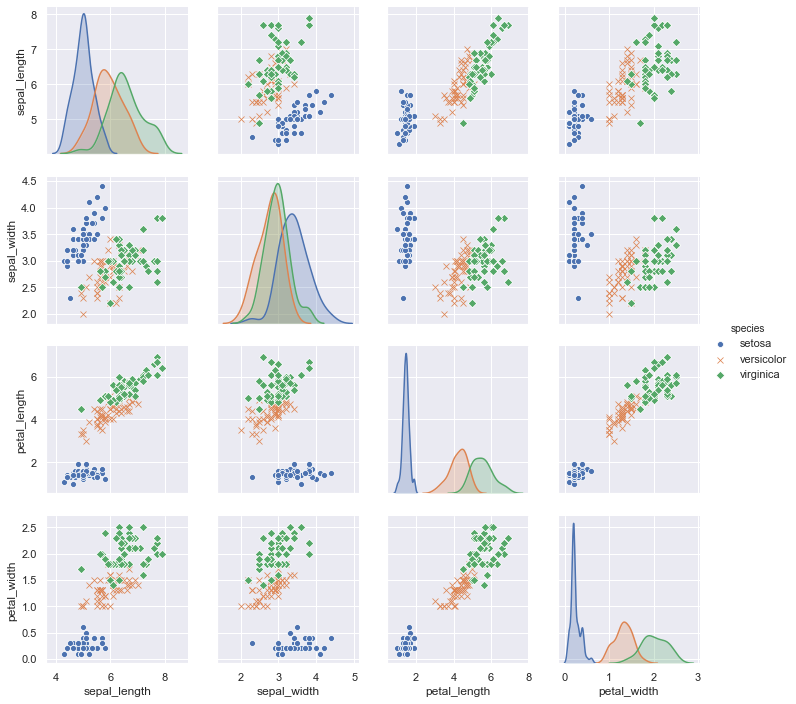

In [152]:
sns.pairplot(df, hue="species", markers=["o", "x", "D"])

... as can be seen from the graphs:
1. The distributions of the attributes for setosa, versicolor and virginica appear to approximate normal distributions. 
2. The average value for sepal length of virginica seems to be larger than for versicolor, which is larger than setosa.
3. The average value for sepal width of setosa seems to be larger than for virginica, which is slightly larger than for versicolor.
4. The average value for the petal length and width of virginica seems to be larger than for versicolor, which is much larger than setosa.
5. All the attributes seem to be positively correlated to varying degrees for all species of flower. 
6. Setosa seems to have weak positive correlations between its attributes except for one pair (sepal width and sepal length).

In order to definitely answer the questions shown in section 2, more rigorous analysis must be conducted. In particular, the average values of the attributes of the specices of the flower are calculated in the next section.

### 4.1 Average values of attributes: <a name="41"></a>
The average values of the different species of Iris flower are calculated using the **mean** function:

#### Setosa

In [153]:
mean1 = df[df['species']=='setosa'].mean()
mean1

sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

#### Virginica

In [154]:
mean2 = df[df['species']=='virginica'].mean()
mean2

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

#### Versicolour

In [155]:
mean3 = df[df['species']=='versicolor'].mean()
mean3

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

#### Output to files
The **output** class is declared to output this data (and all subsequent summary statistics) to **summary.txt**.

In [156]:
# Declare class which outputs to summary files
# It outputs to summaryX.txt, where X is a
# number which indicates the order in which
# the file was output and after
# 5 instances of the class has been created
# it outputs summary.txt
class output: 
    
    # string indicates filename in 
    # summaryX.txt
    sum_string = "summary"
    
    # counter is a class variable which
    # is incremented every time an 
    # instance of the class is created.
    counter = 0
    
    # Tracks how many appends to 
    # summaryX.txt have been made
    append_count = 0
    
    # This is the constructor. 
    # it creates the heading 
    # for the summaryX.txt file
    # or it deletes all files and
    # creates a summary.txt file
    def __init__(self, heading_str):
        
        # create summaryX.txt with heading when
        # counter is less than 5
        if(output.counter < 5):
            
            # Increment class variable counter
            output.counter += 1
            
            # Instance variable output_string is "summaryX.txt"
            self.output_string = self.sum_string + str(output.counter)
            
            # Output to summaryX.txt
            with open(self.output_string +".txt", 'w') as f:
                f.write(heading_str)
                f.write("\n")
                f.write("\n")
        
        # Delete summaryX.txt files and create
        # summary.txt if fifth instances of the 
        # class has been created
        else:
            self.delete_summaries()
            self.create_summary()
    
    # This appends value (which could be means, medians etc)
    # to the preexisting summaryX.txt file
    def append_open(self, value): 
        
        with open(self.output_string + ".txt", 'a') as f:
            
            # Using pandas to_csv function, append (mode = 'a') to summaryX.txt
            f.write("\n")
            value.to_csv(self.output_string + ".txt", header=False, index=True, mode='a')
            
            # Increment append_count which indicates
            # how many appends have been made for 
            # this instance of the class
            output.append_count += 1
            
            # Add newline if three appends has been made
            if(output.append_count ==3):
                f.write("\n")
                output.append_count = 0
             
    # This deletes summary
    def delete_summaries(self):
        
        # This array opens the summary files and puts them
        # in the array data_array
        self.data_array = []
        
        # For loop goes from 1 to 5, or 2 to 6 etc. depending
        # on what counter was set to initially (if it was 
        # set to 0, it goes from 1 to 5)
        for i in range(output.counter - 4, output.counter + 1):
            
            # Open summaryX.txt and add to data_array
            fin = open("summary" + str(i) +".txt", "r")
            self.data_array.append(fin.read())
            fin.close()
            
            # Delete superfluous summary files after 
            # data is extracted from them
            os.remove("summary" + str(i) +".txt")
            
    # This code takes each summary file and combines it into one file
    def create_summary(self):
        # This code takes each summary file and combines it into one file
        # summary.txt
        
        # combined_data is all the data collected from
        # the summary files.
        self.combined_data = ""

        # This adds up all the data 
        # in data_array
        for i in self.data_array:
            self.combined_data += i
    
        # This outputs combined_data
        # to summary_txt
        fout = open("summary.txt", "w")
        fout.write(self.combined_data)
        fout.close()

In [157]:
# An instance of the class output is created to output to summary1.txt
first_output = output("Means for setosa, virginica and versicolor respectively")

# Append to summary1.txt
first_output.append_open(mean1)
first_output.append_open(mean2)
first_output.append_open(mean3)

Now the average values are calculated for each attribute for each species, the median values are calculated as follows:

### 4.2 Median values of attributes <a name="42"></a>

The medians are calculated using the **median** function:

#### Setosa

In [158]:
median1 = df[df['species']=='setosa'].median()
median1

sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64

#### Virginica

In [159]:
median2 = df[df['species']=='virginica'].median()
median2

sepal_length    6.50
sepal_width     3.00
petal_length    5.55
petal_width     2.00
dtype: float64

#### Versicolour

In [160]:
median3 = df[df['species']=='versicolor'].median()
median3

sepal_length    5.90
sepal_width     2.80
petal_length    4.35
petal_width     1.30
dtype: float64

#### Output to files

In [161]:
# An instance of the class output is created to output to summary2.txt
second_output = output("Medians for setosa, virginica and versicolor respectively")

# Append to summary2.txt
second_output.append_open(median1)
second_output.append_open(median2)
second_output.append_open(median3)

### 4.3 Difference between medians and means <a name="43"></a>

The difference between the means and the medians expressed as a percentage of the mean are calculated as follows:

#### Setosa

In [162]:
diff1 = df[df['species']=='setosa'].mean() - df[df['species']=='setosa'].median()
mean1 = df[df['species']=='setosa'].mean()
diff1 = 100*diff1/mean1
diff1

sepal_length     0.119856
sepal_width      0.526624
petal_length    -2.459016
petal_width     18.032787
dtype: float64

#### Virginica

In [163]:
diff2 = df[df['species']=='virginica'].mean() - df[df['species']=='virginica'].median()
mean2 = df[df['species']=='virginica'].mean()
diff2 = 100*diff2/mean2
diff2

sepal_length    1.335762
sepal_width    -0.874243
petal_length    0.036023
petal_width     1.283317
dtype: float64

#### Versicolour

In [164]:
diff3 = df[df['species']=='versicolor'].mean() - df[df['species']=='versicolor'].median()
mean3 = df[df['species']=='versicolor'].mean()
diff3 = 100*diff3/mean3
diff3

sepal_length    0.606469
sepal_width    -1.083032
petal_length   -2.112676
petal_width     1.960784
dtype: float64

#### Output to files

In [165]:
# An instance of the class output is created to output to summary3.txt
third_output = output("Percentage differences between medians and means for setosa, virginica and versicolor respectively.")

# Append to summary3.txt
third_output.append_open(diff1)
third_output.append_open(diff2)
third_output.append_open(diff3)

For most of the values, the difference between the mean and the median is small or neglible which indicates that the attributes  approximate the normal distribution (a perfect normal distribution would have the same value for mean and median) [4](#ref4). There is a -2% and -2.5% difference between the mean and median for versicolour and setosa petal length respectively which indicates that the distribution is slightly left-skewed (mean<median, left-skew) but still a good approximation to the normal distribution. For setosa petal width, there is an 18% difference between the mean and the median indicating a moderate skew to the right (mean>median, right-skew). This calls into question whether petal width for setosa is a good approximation to the normal distribution.

In order to rigorously test whether the attributes are normally distrbuted, the Shapiro-Wilk test is employed [5](#ref5)

### 4.4 Shapiro-Wilk test for normality <a name="44"></a>
This test works by setting a cut-off value called alpha (in this case alpha=0.05). The test is performed on the data. If the p-value extracted from the test exceeds alpha, then we cannot reject the null hypothesis that the sample approximates a normal distribution. Otherwise, we can safely reject the null hypothesis and say the distribution is not normal.
The test is conducted for the attributes of all species of Iris flower by writing an appropriate function:

In [166]:
# Function to perform Shapiro-Wilk test for normality on attributes of flowers in data set
def shapiro_test(attribute, sp):
    
    # Cut off value
    alpha = 0.05
    
    # the attribute and species to be tested
    data = df[df['species']==sp][attribute]
    
    # Test statistic and p-value
    stat, p = shapiro(data)
    
    # Output results to screen
    print("test statistic: {}, p-value: {}".format(stat, p))
    
    # If p-value exceeds cut-off value
    if p > alpha:
        print("Null hypothesis is not rejected, sample approximates normal distribution")
    else:
        print("Null hypothesis is rejected, sample does not approximate normal distribution")

#### Setosa

In [167]:
shapiro_test("petal_length", "setosa")

test statistic: 0.9549458622932434, p-value: 0.05464918911457062
Null hypothesis is not rejected, sample approximates normal distribution


In [168]:
shapiro_test("petal_width", "setosa")

test statistic: 0.8138170838356018, p-value: 1.8525804534874624e-06
Null hypothesis is rejected, sample does not approximate normal distribution


In [169]:
shapiro_test("sepal_length", "setosa")

test statistic: 0.9776989221572876, p-value: 0.4595281183719635
Null hypothesis is not rejected, sample approximates normal distribution


In [170]:
shapiro_test("sepal_width", "setosa")

test statistic: 0.968691885471344, p-value: 0.20465604960918427
Null hypothesis is not rejected, sample approximates normal distribution


#### Virginica

In [171]:
shapiro_test("petal_length", "virginica")

test statistic: 0.9621862769126892, p-value: 0.10977369546890259
Null hypothesis is not rejected, sample approximates normal distribution


In [172]:
shapiro_test("petal_width", "virginica")

test statistic: 0.9597718715667725, p-value: 0.08695744723081589
Null hypothesis is not rejected, sample approximates normal distribution


In [173]:
shapiro_test("sepal_length", "virginica")

test statistic: 0.9711798429489136, p-value: 0.25832483172416687
Null hypothesis is not rejected, sample approximates normal distribution


In [174]:
shapiro_test("sepal_width", "virginica")

test statistic: 0.9673910140991211, p-value: 0.1809043288230896
Null hypothesis is not rejected, sample approximates normal distribution


#### Versicolour

In [175]:
shapiro_test("petal_length", "versicolor")

test statistic: 0.9660047888755798, p-value: 0.1584833413362503
Null hypothesis is not rejected, sample approximates normal distribution


In [176]:
shapiro_test("petal_width", "versicolor")

test statistic: 0.947626531124115, p-value: 0.027278218418359756
Null hypothesis is rejected, sample does not approximate normal distribution


In [177]:
shapiro_test("sepal_length", "versicolor")

test statistic: 0.9778355956077576, p-value: 0.46473264694213867
Null hypothesis is not rejected, sample approximates normal distribution


In [178]:
shapiro_test("sepal_width", "versicolor")

test statistic: 0.9741330742835999, p-value: 0.33798879384994507
Null hypothesis is not rejected, sample approximates normal distribution


All but two datasets pass the test of normality, which is expected by the shape of the distributions in the plots shown at the beginning of this section. The only two datasets that fail the test of normality are the versicolor petal widths and the setosa petal widths. The setosa petal widths had a relatively large difference between the mean and the median (18%) so it is expected that they would fail the test for normality. The difference between the mean and the median for versicolor petal width was only 2% however, so it is surprising that that distribution fails the test of normality when other datasets with larger differences passed.

The difference between the means for different species of flower is calculated in the next section.

### 4.5 Difference between means <a name="45"></a>
The difference between the means are calculated with the **mean** function:

#### Versicolour and Setosa

In [179]:
mnd1 = df[df['species']=='versicolor'].mean() - df[df['species']=='setosa'].mean() 
mnd1

sepal_length    0.930
sepal_width    -0.648
petal_length    2.796
petal_width     1.082
dtype: float64

#### Virginica and setosa

In [180]:
mnd2 = df[df['species']=='virginica'].mean() - df[df['species']=='setosa'].mean() 
mnd2 

sepal_length    1.582
sepal_width    -0.444
petal_length    4.088
petal_width     1.782
dtype: float64

#### Virginica and versicolor

In [181]:
mnd3 = df[df['species']=='virginica'].mean() - df[df['species']=='versicolor'].mean() 
mnd3

sepal_length    0.652
sepal_width     0.204
petal_length    1.292
petal_width     0.700
dtype: float64

#### Output to files

In [182]:
# An instance of the class output is created to output to summary4.txt
fourth_output = output("Differences between means for versicolor/setosa, virginica/setosa and virginica/versicolor respectively.")

# Append to summary4.txt
fourth_output.append_open(mnd1)
fourth_output.append_open(mnd2)
fourth_output.append_open(mnd3)

These results indicate that:
1. Versicolor has larger sepal length, petal length and petal width than setosa but smaller sepal width.
2. Virginica has larger sepal length, petal length and petal width than setosa but smaller sepal width
3. Virginica has larger sepal length, sepal width, petal length and petal width than versicolor.

These results are congruent with the pairplots. It must be determined if these difference are statistically significant i.e. whether these differences are due to sampling error or reflect real differences in the means. This is done by performing an independant samples t-test and is done in the next section:

### 4.6 Test for statistical significance <a name="46"></a>
The appropriate test for significance for the difference between means between two independant groups is the independant t-test [6](#ref6). In order to conduct the t-test, it is necessary that the variances are homogeneous and that the dependant variable is normally distrbuted within each group. This technically means that the test is not appropriate for versicolor petal widths and the setosa petal widths as it was previously shown that they fail the Shapiro-Wilk test for normality. However, the independant t-test is robust to moderate violations of normality and homogenity (i.e. the samples having different variances) as long as:

1. The sample sizes are the same. [7](#ref7)
2. The sample size of each group is greater than or equal to 30.
3. If the variance of one group is not more than 4 times larger than the variance of the other group.

Each and every attribute has 50 data points for each species of Iris flower so conditions 1 and 2 are met. Condition three is tested as follows:

In [183]:
# Get standard deviations of all attributes for every species of flower
set_std = df[df['species']=='setosa'].drop(columns=['species']).std()
virg_std = df[df['species']=='virginica'].drop(columns=['species']).std()
vers_std = df[df['species']=='versicolor'].drop(columns=['species']).std()

# Get variances of all attributes for every species of flower = std^2
set_var = set_std**2
virg_var = virg_std**2
vers_var = vers_std**2

# Divide one by another to see how many times the variance of one group is larger than another

#### Versicolor and setosa

In [184]:
vers_var/set_var

sepal_length    2.144345
sepal_width     0.678259
petal_length    7.334599
petal_width     3.402344
dtype: float64

#### Virginica and setosa

In [185]:
virg_var/set_var

sepal_length     3.254295
sepal_width      0.716382
petal_length    10.117137
petal_width      6.562855
dtype: float64

#### Virginica and versicolor

In [186]:
virg_var/vers_var

sepal_length    1.517618
sepal_width     1.056207
petal_length    1.379372
petal_width     1.928922
dtype: float64

... as can be seen from the results, there are several violations of the third condition. The difference between the variances of virginica and setosa petal lengths is 10 times, the difference between the petal widths of same is 6.5 times. The difference between virginica and versicolor petal length variances is 10, the difference between petal width variances for same is 6.5 times. The variance difference for the petal lengths of versicolor and setosa is 7.3 times. However, the Welch's t-test (which is like the independant t-test but for unequal variances) can still be used. As before, if the p-value of the test is less than the cut-off value (in this case 0.05) then we can reject the null hypothesis that the means are the same. This is done as follows:

In [187]:
def ind_test(group1, group2):
    
     # Independant two sample t-test for difference between means of groups
     print ("Independent two sample t-test for groups with different means: ")
    
     # equal_var = False means that the Welch's t-test is used for samples with unequal variances
     print (stats.ttest_ind(group1, group2, equal_var = False))
    
     # Degrees of freedom
     print ("Degrees of freedom: ")
    
     # Degrees of freedom = size of group 1 + size of group 2 - 1
     print (len(group1) + len(group2) - 1)

These tests are used to see if the difference between the means are statistically significant:

In [188]:
# create three dataframes for each species without the species column
df1 = df[df['species']=='virginica'].drop(columns=['species'])
df2 = df[df['species']=='setosa'].drop(columns=['species'])
df3 = df[df['species']=='versicolor'].drop(columns=['species'])
# Perform independant t-test for different species for each and every attribute

#### Versicolour and Setosa

In [189]:
ind_test(df3, df2)

Independent two sample t-test for groups with different means: 
Ttest_indResult(statistic=array([10.52098627, -9.28277256, 39.46866259, 34.01237859]), pvalue=array([3.74674261e-17, 5.87960147e-15, 1.05721003e-45, 1.53779681e-47]))
Degrees of freedom: 
99


#### Virginica and setosa

In [190]:
ind_test(df1, df2)

Independent two sample t-test for groups with different means: 
Ttest_indResult(statistic=array([15.38619582, -6.289385  , 49.96570336, 42.73822967]), pvalue=array([3.96686727e-25, 9.58603917e-09, 9.71386706e-50, 1.46674942e-48]))
Degrees of freedom: 
99


#### Virginica and versicolor

In [191]:
ind_test(df1, df3)

Independent two sample t-test for groups with different means: 
Ttest_indResult(statistic=array([ 5.62916526,  3.20576075, 12.60377944, 14.62536705]), pvalue=array([1.86614439e-07, 1.81948348e-03, 4.90028753e-22, 2.11153440e-25]))
Degrees of freedom: 
99


The results show that all the p-values are much less than 0.05 for all differences between the means for virginica, setosa and versicolor. This means that the null hypothesis that the means are the same for all 4 attributes (petal length, petal width, sepal length and sepal width) can be safely rejected.

### 4.7 Correlations between pairs of attributes <a name="47"></a>
To determine how correlated (or related) the attributes of the species of flower are, Pearson's correlation coefficient is calculated. [8](#ref8) 

The calculations of the correlation coefficients are given as follows:

#### Setosa

In [192]:
corr1 = df[df['species']=='setosa'].corr(method="pearson")
corr1

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


#### Virginica

In [193]:
corr2 = df[df['species']=='virginica'].corr(method="pearson")
corr2

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


#### Versicolour

In [194]:
corr3 = df[df['species']=='versicolor'].corr(method="pearson")
corr3

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


#### Output to files

In [195]:
# An instance of the class output is created to output to summary5.txt
fifth_output = output("Correlation matrices for setosa, virginica and versicolour respectively.")

# Append to summary5.txt
fifth_output.append_open(corr1)
fifth_output.append_open(corr2)
fifth_output.append_open(corr3)

These results indicate that:
1. Setosa's attributes are all positively correlated, as are virginica and versicolour
2. Setosa sepal width and sepal length are highly correlated (r>0.7) [9](#ref9)
3. All other attributes for setosa are weakly correlated (r<0.5)
4. Virginica petal length and sepal length are highly correlated.
5. Virginica petal width and sepal width are moderately correlated (0.5<r<0.7) 
6. All other attributes for virginica are weakly correlated.
7. Versicolour petal length and sepal length are highly correlated.
8. Versiscolour petal width and petal length are highly correlated.
9. All other attributes for versicolour are moderately correlated.

### 4.8 Output data to summary.txt  <a name="48"></a>
The summary files are combined into one file called "summary.txt" using the following method:

In [196]:
# This creates an instance of the output class but it is the fifth
# instance so it deletes all previous summaryX.txt files
# and combines the data into summary.txt.
# An empty string is passed as an argument
# to the constructor because it has to take
# a string as an argument but will do nothing with it
final_output = output("")

## 5 Conclusions  <a name="conclusions"></a>
The following conclusions can be made from the preceding data analysis:

1. What the average or mean values are for each attribute for each species of flower.
2. What the median values are for each attribute for each species of flower.
3. The difference between the mean and the median values is mostly small or negligble except setosa petal width which has a moderate difference between its mean and median.
4. All but two of the attributes for each species is flower is normally distributed (the two datasets that fail the test for normality are versicolor petal widths and setosa petal widths)
5. What the difference between the means are for each species of flower.
6. The differences between the means are statistically significant and unlikely to be due to sampling error.
7. What the correlations are for each pair of attribute for each species of flower.

Further study can be done using machine learning. In particular, a classification algorithm such as decision trees can be used to predict the species of flower based on this dataset.

## 6 Bibliography <a name="bibliography"></a>

[1] Bari, A. et al. Predictive Analytics For Dummies.. Wiley, 2016. <a name="ref1"></a>

[2] Nelli, F.. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language.. Apress, 2015. <a name="ref2"></a>

[3] Archive.ics.uci.edu, http://archive.ics.uci.edu/ml/datasets/iris, last accessed 15/04/2020 <a name="ref3"></a>

[4] Administration, U.S.F.. Fire Data Analysis Handbook; Second Edition.. Fema, 2004 <a name="ref4"></a>

[5] Surhone, L.M. et al. Shapiro-Wilk Test.. VDM Publishing, 2010. <a name="ref5"></a>

[6] Urdan, T.C.. Statistics in Plain English.. Lawrence Erlbaum Associates, 2005. <a name="ref6"></a>

[7] Pagano, R.R.. Understanding Statistics in the Behavioral Sciences.., 339, Cengage Learning, 2012. <a name="ref7"></a>

[8] Boslaugh, S.. Statistics in a Nutshell.. O'Reilly Media, Incorporated, 2012. <a name="ref8"></a>

[9] Mukaka, M M. “Statistics corner: A guide to appropriate use of correlation coefficient in medical research.” Malawi medical journal : the journal of Medical Association of Malawi vol. 24,3 (2012): 69-71. <a name="ref9"></a>